In [9]:
#trying to understand how to adjust τ based on initial drt data
using EISAnalysis

Parameters
__________
Any[:(3419.0r), :(2.7671e-8c), :(2495.9r), :(2.575e-5c)]

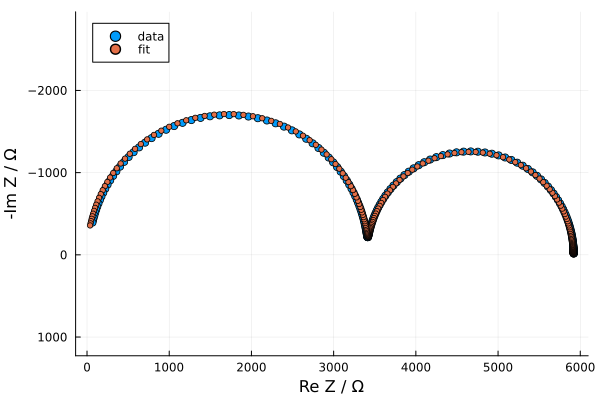

EISAnalysis.Circuit(Real[0.1, 0.10718913192051278, 0.11489510001873092, 0.12315506032928256, 0.1320088400831418, 0.1414991297434576, 0.15167168884709228, 0.16257556664437942, 0.174263338600965, 0.18679135990207824  …  53535.666774107296, 57384.416483023924, 61509.857885804915, 65931.88271333542, 70671.81273927506, 75752.5025877192, 81198.44993184025, 87035.91361485166, 93293.04026284677, 100000.0], ComplexF64[5914.796909330364 - 16.072689414150922im, 5914.781554600715 - 17.228070481137124im, 5914.763913001965 - 18.466488925936467im, 5914.743643977323 - 19.793908744927958im, 5914.720356267617 - 21.216721381403545im, 5914.6936003667615 - 22.74177615146767im, 5914.6628598559255 - 24.376412786995573im, 5914.627541450123 - 26.128496231591857im, 5914.586963566508 - 28.00645383150813im, 5914.540343195522 - 30.01931506906334im  …  128.27953904548997 - 650.4418315160005im, 112.19499178320436 - 609.7796768294163im, 98.06713039995358 - 571.3097664878412im, 85.67219281021003 - 534.9793709004942im,

In [17]:
using Plots,DataFrames,CSV
data = CSV.read("Data/example_measurements.csv",DataFrame)
data
ω_exp = data[!,"frequencies"]
Z_exp = data[!,"real"]+im*data[!,"imag"]
scatter(Z_exp,yflip = true,aspect_ratio= :equal)
circuit = 3000r/(1e-06 * c)-2000r/(1e-04*c)
rc_fit = circuit_fit(circuit,ω_exp,Z_exp)

In [40]:
circuit = (r-wo-c)/(q-c) -r- r/q-r/q

EISAnalysis.Circuit(Real[100000.0, 71968.5673001152, 51794.746792312115, 37275.9372031494, 26826.957952797256, 19306.977288832502, 13894.954943731376, 10000.0, 7196.85673001152, 5179.474679231211  …  0.019306977288832503, 0.013894954943731377, 0.01, 0.007196856730011521, 0.005179474679231211, 0.00372759372031494, 0.002682695795279726, 0.0019306977288832503, 0.0013894954943731376, 0.001], ComplexF64[1.000092731331231 - 0.0002952986932285843im, 1.0001206563035543 - 0.00038506852206687716im, 1.0001569947879123 - 0.0005022008756092378im, 1.000204284676252 - 0.0006550632517733371im, 1.0002658315148252 - 0.0008545917817244101im, 1.000345942198433 - 0.001115083079445865im, 1.000450230866615 - 0.0014552311660294998im, 1.0005860200552 - 0.0018994854657928466im, 1.0007628680348934 - 0.002479829334680577im, 1.0009932641853547 - 0.003238109132508822im  …  5.667728410828979 - 43.37501909111066im, 6.464037993156941 - 59.53985536996293im, 7.510919129240856 - 81.78977861082375im, 8.887837879063285 - 1

In [41]:
println(circuit.order)
println(circuit.operators)
println(circuit.subcircuits)

[1, 2, 4, 3, 5, 7, 6, 9, 8]
Function[-, -, /, -, -, -, /, -, /]
[1, 1, 1, 2, 2, 2, 3, 3, 4, 4]


In [ ]:
function print_circuit(circuit)
    for i circuit.subcircuits
        sub_i = findall(isequal(i),circuit.subcircuits)[1:end-1]
        print("(")
        for j in sub_i
            print("(",circuit.elements[j],circuit.operators[j])
        end
        print(circuit.elements[end])
    return nothing
end

print_circuit (generic function with 1 method)

In [45]:
print_circuit(circuit)

(1.0r-(1.0 * wo ^ 1.0-(1.0c/(1.0 * q ^ 0.8-(1.0c-(1.0r-(1.0r/(1.0 * q ^ 0.8-(1.0r/1.0 * q ^ 0.8